# GERMANY

In [909]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)
import plotly
import plotly.express as px

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

## Uppgift 1 - Landstatistik 

In [910]:
germany, germany_all = Functions.hashed_names(olympics)
germany = germany.reset_index(drop=True)
germany.head(5)

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


### De sporter tyskland fått mest medaljer i

In [911]:
fig, top_sports = Functions.top_german_sports(germany_all, top_n = 10)
fig.show()

### Antal medaljer per OS

In [912]:
fig, medals_breakdown = Functions.medals_each_year(germany_all, ["GER", "FRG", "GDR"], "German Olympic Medals per Year")
fig.show()

In [913]:
Functions.plot_participants(germany_all)

### Histogram över åldrar

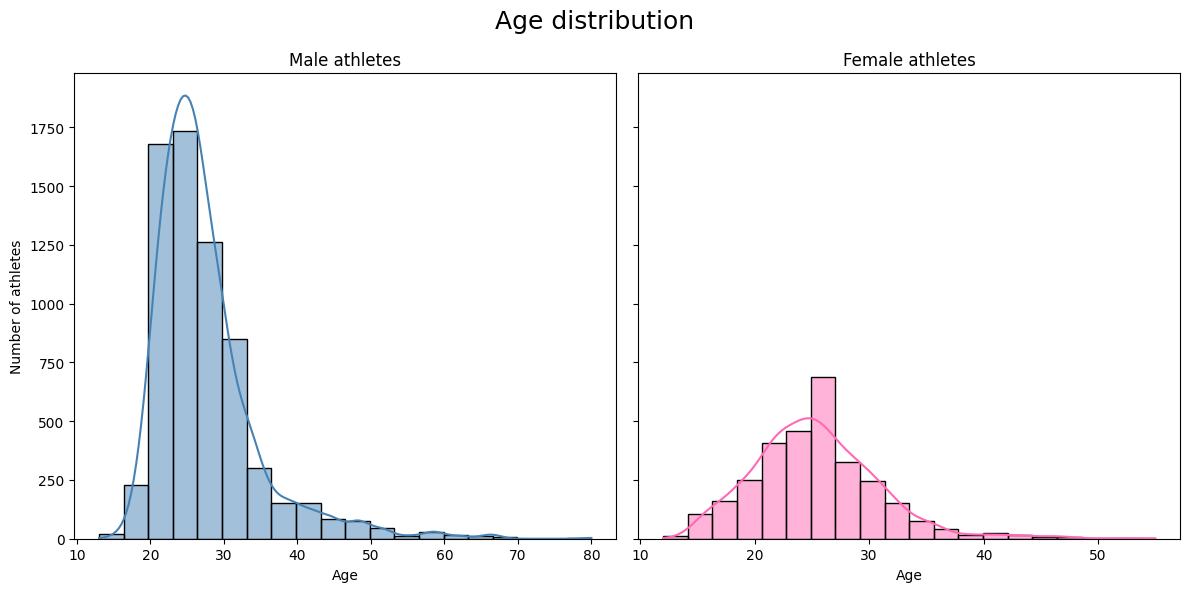

In [914]:
Functions.plot_age_distribution(germany)

### Väst och Öst-Tyskland

In [915]:
Functions.sex_dist_all(germany_all)

In [916]:
Functions.sex_dist_divided(germany_all, [1968, 1972, 1980, 1988])

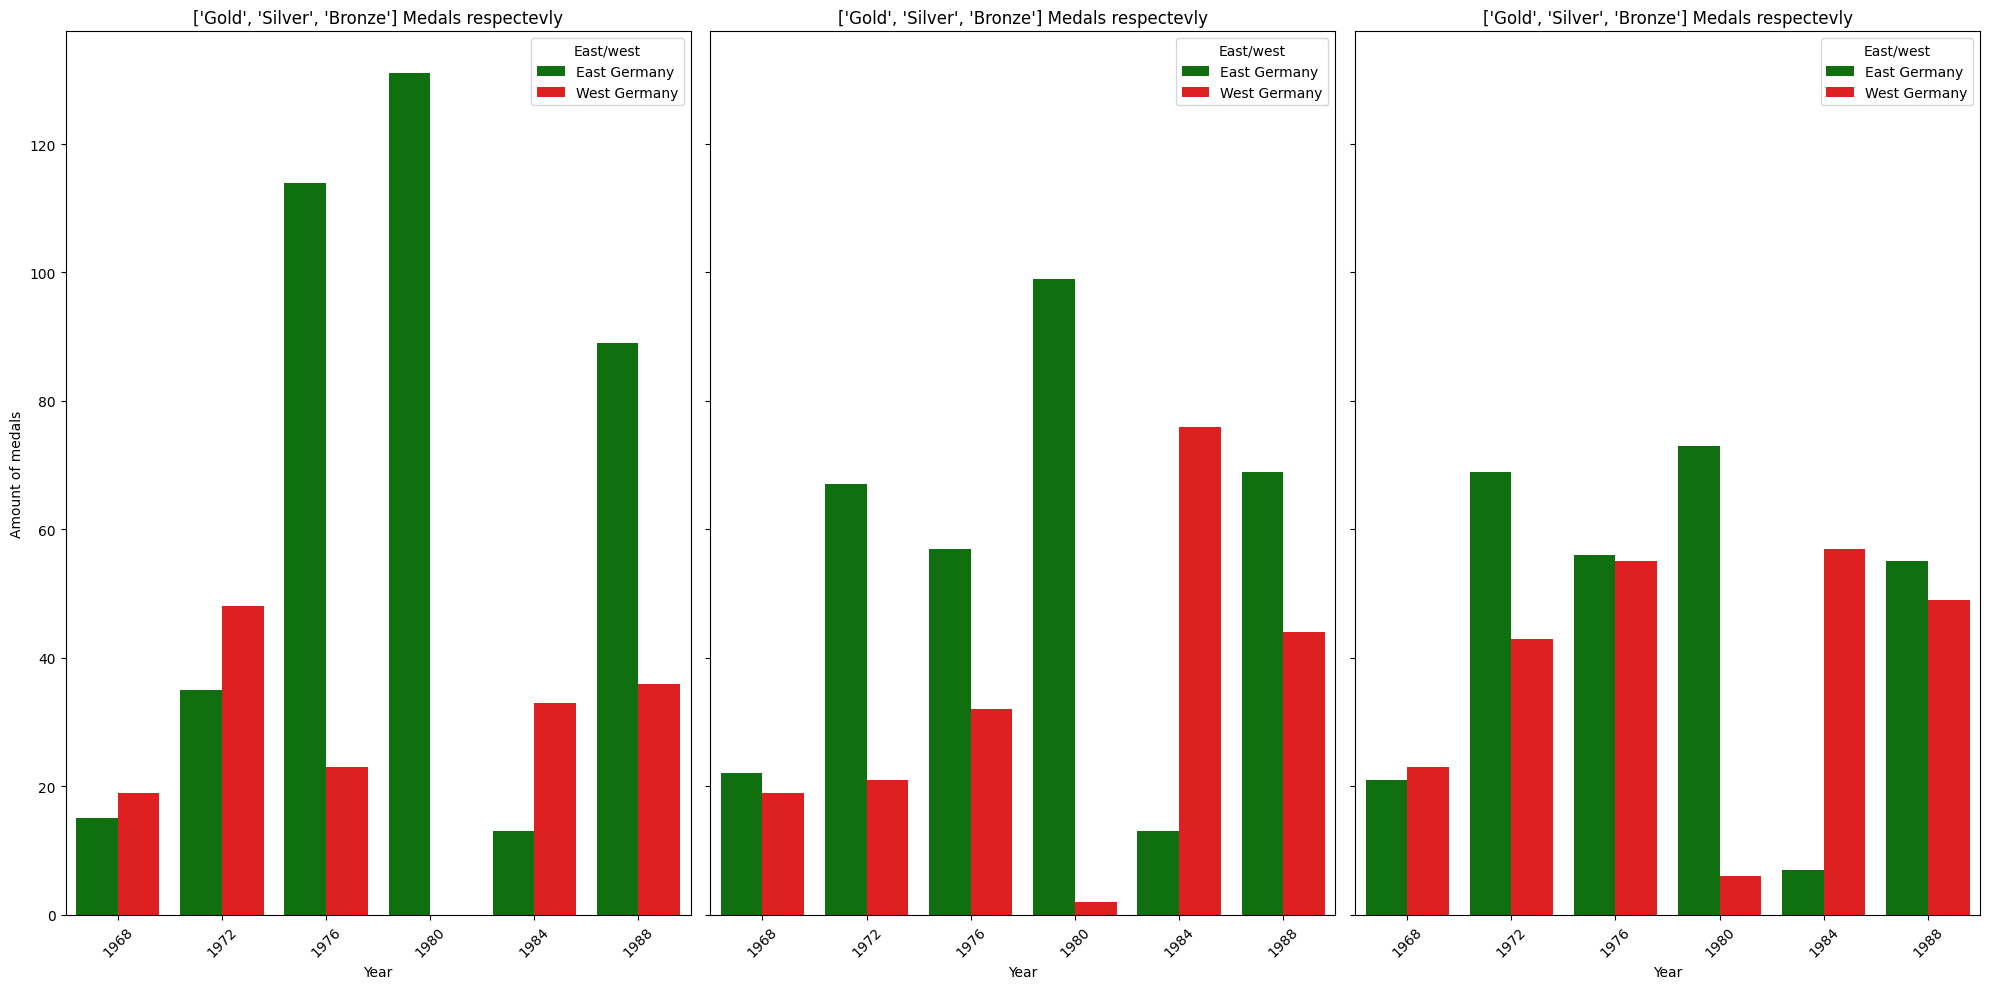

In [917]:
east = east_germany[['Year', 'Medal']].dropna(subset=['Medal'])
east_medals = east.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
east_medals

west = west_germany[['Year', 'Medal']].dropna(subset=['Medal'])
west_medals = west.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

fallen_years = sorted(set(west_medals.index).union(set(east_medals.index)))
Dif_medals = ['Gold', 'Silver', 'Bronze']

fig, axes= plt.subplots(1,3, figsize=(20,10),sharey=True)


for i, medal in enumerate (Dif_medals):
    ax = axes[i]
    plotting = pd.DataFrame({'Year': fallen_years, 'East Germany':east_medals[medal].values,'West Germany': west_medals[medal].values})

    medal_molten = plotting.melt(id_vars='Year', var_name='East/west', value_name= 'Number of medals')
    sns.barplot(data=medal_molten,x='Year', y='Number of medals', ax=ax, hue='East/west', palette= {'East Germany': 'green', 'West Germany': 'red'})
    ax.set_title(f'{Dif_medals} Medals respectevly')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount of medals')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## Uppgift 2 - Sportstatistik

In [918]:
fig = Functions.age_dist_per_sex(olympics, germany_all, country='Germany', sport='Equestrianism')
fig.show()

In [919]:
Functions.plot_efficiency(olympics, germany_all, country='Germany', sport='Swimming')

In [920]:
fig = Functions.medal_distribution(olympics, sport='Equestrianism')
fig.show()

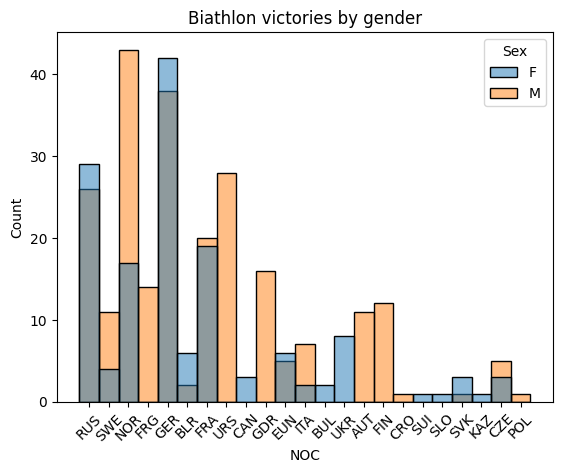

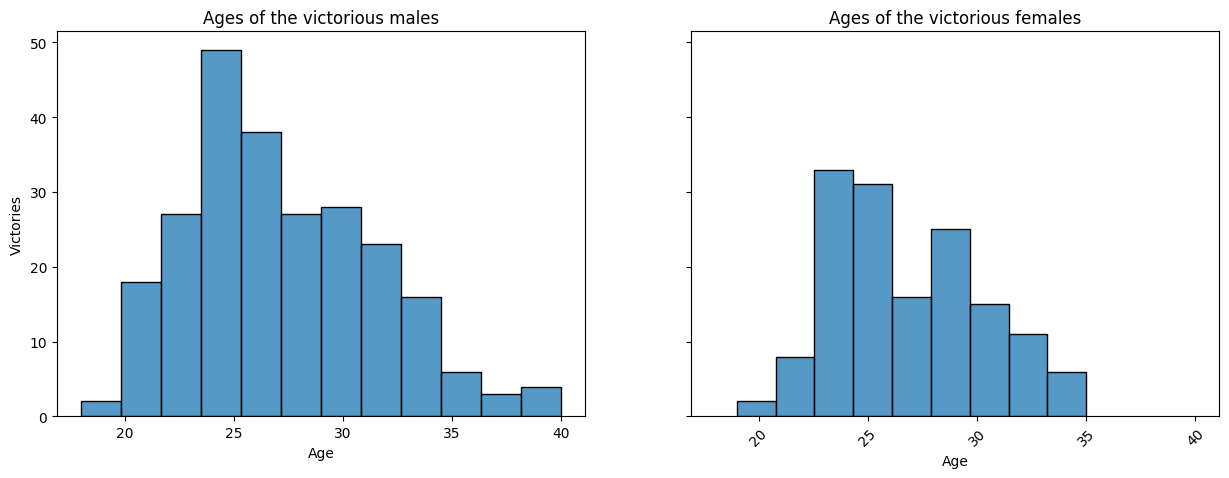

In [921]:
Biat= olympics[olympics['Sport']== 'Biathlon']
Biat=Biat.dropna()
M_Biat = Biat[Biat['Sex']== 'M']
F_Biat = Biat[Biat['Sex']== 'F']


sns.histplot(data=Biat, x='NOC', hue='Sex')
plt.title('Biathlon victories by gender')
plt.xticks(rotation=45)
plt.show()

fig, axes= plt.subplots(1,2, figsize=(15,5),sharey=True, sharex=True)
sns.histplot(data=M_Biat, x= 'Age', ax = axes[0])
axes[0].set_title('Ages of the victorious males')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Victories')
plt.xticks(rotation = 45)
sns.histplot(data=F_Biat, x= 'Age', ax = axes[1])
axes[1].set_title('Ages of the victorious females')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Victories')
plt.xticks(rotation = 45)
plt.show()

In [922]:
fig, df_filtered = Functions.medal_distribution_weight_height(olympics, sport = "Ski Jumping")
fig.show()

In [923]:
fig, medal_counts = Functions.stats_for_country(olympics, "Germany")
fig.show()

In [924]:
fig, medal_counts = Functions.stats_for_sport(olympics, "Football", top_n = 10)
fig.show()

# Kanske ha kvar kanske inte

In [925]:
fig, season_medals = Functions.summer_vs_winter(germany_all, ["GER", "GDR", "FRG"])
fig.show()